In [ ]:
!pip install -U scikit-learn

In [ ]:
# import libraries

import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


from collections import Counter
from tensorflow.keras.models import Sequential


from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error , r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# **Load The Data**

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Explore Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#check for duplicated values
df.duplicated().sum()

0

In [ ]:
#is my dataset balanced?
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# Check missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **Visualization**

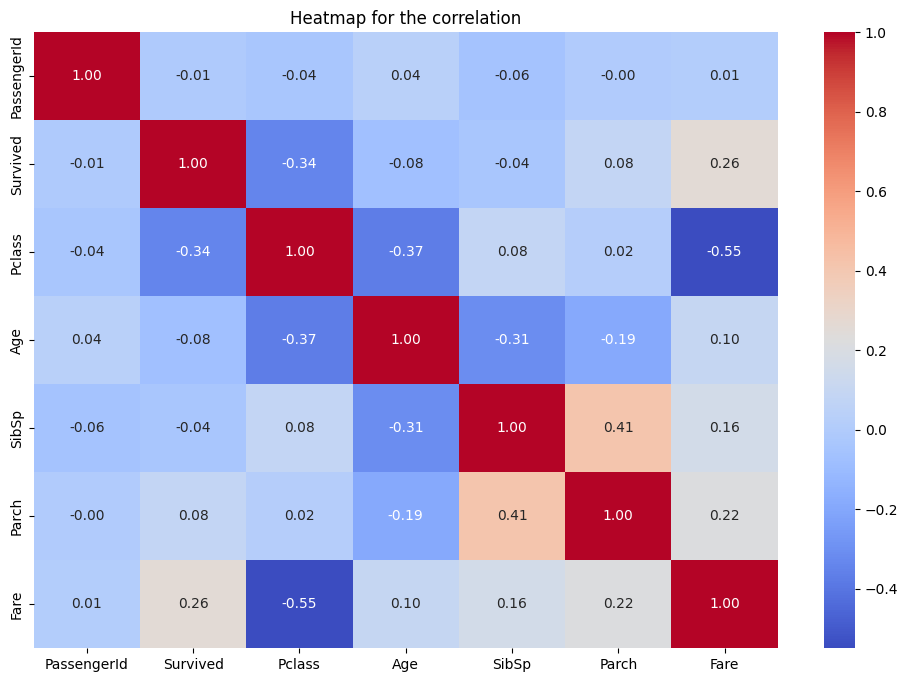

In [ ]:
# Visualization

numeric_columns = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap for the correlation')
plt.show()

# **Preprocessing and Cleaning**

## **Handle Missing Values**

In [ ]:
#Since the majority of cabin records are missing, we will drop this column.

df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# We should replace the two nulls values in Embarked column with the mode

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Replace the nulls in age column with the median

df['Age'].fillna(df['Age'].median(), inplace= True)

## **Feature Selection**

In [ ]:
# Drop the ireleavant features

df.drop(['PassengerId', 'Name' , "Ticket"],inplace=True,axis=1)

## **One hot Encoding**

In [ ]:
df = pd.get_dummies(df, columns=["Embarked", "Sex"],dtype=int)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,0,3,28.0,1,2,23.4500,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1


# **Split The Data**

In [ ]:
# Spliting the data into train and test

x = df.drop('Survived',axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101, shuffle=True)

In [ ]:
# Scaling the data

scaler = StandardScaler()

x = scaler.fit_transform(x)

# **Train the Model**

In [ ]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[10]),
    tf.keras.layers.Dense(units=32), tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Dense(units=128), tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Dense(units=128), tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Dense(units=128), tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=2, activation="sigmoid"),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

NN.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer=optimizer)

NN.summary()

hist = NN.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

In [ ]:
# Predict probabilities for each class

y_pred_prob = NN.predict(x_test)

# Convert probabilities to class labels
y_pred_NN = np.argmax(y_pred_prob, axis=1)

y_pred_NN

6/6 [==============================] - 0s 3ms/step


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0])

In [ ]:
# Accuracy

# Evaluate the model on test data
test_loss, test_accuracy = NN.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

6/6 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8324
Test Loss: 0.4069626033306122
Test Accuracy: 0.832402229309082


In [ ]:
# Precision

precision_NN = precision_score(y_test, y_pred_NN, average='micro')

print(f'Precision: {precision_NN}')

Precision: 0.8324022346368715


In [ ]:
# Recall

recall_knn = recall_score(y_test , y_pred_NN , average = "weighted")
recall_knn

0.8324022346368715

In [ ]:
# F1 score

f1 = f1_score(y_test, y_pred_NN, average='micro')

print(f'F1 Score: {f1}')

F1 Score: 0.8324022346368715


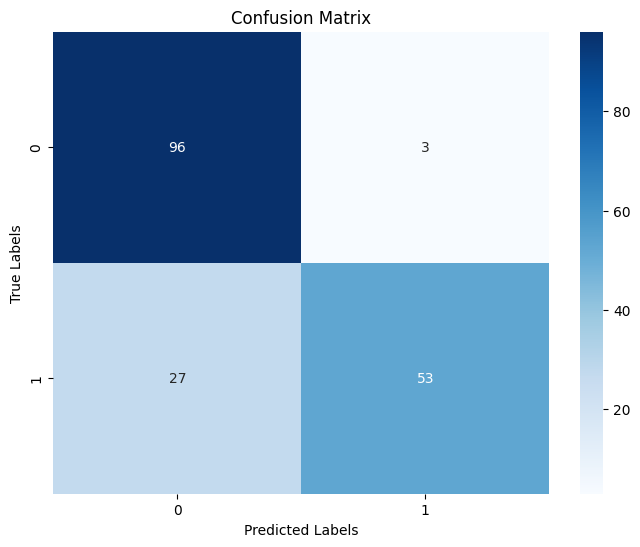

In [ ]:
# Confusion matrix

cm_NN = confusion_matrix(y_test, y_pred_NN)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_NN, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Mean Squared Error(MSE)

mse_NN = mean_squared_error(y_test , y_pred_NN)
mse_NN

0.16759776536312848